In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS

In [4]:
df_fake=pd.read_csv (r'/kaggle/input/fake-news-text-dataset/DataSet_Misinfo_FAKE.csv')
df_fake['truthfulness']=0
df_fake=df_fake.drop(columns=['Unnamed: 0'], axis=1)
df_fake.to_csv('df_fake.csv', index=False)

In [5]:
df_fake=pd.read_csv (r'/kaggle/working/df_fake.csv')
df_fake

,text,truthfulness
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
43637,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
43638,The Ukrainian coup d'etat cost the US nothing ...,0
43639,The European Parliament falsifies history by d...,0
43640,The European Parliament falsifies history by d...,0


In [6]:
df_true=pd.read_csv (r'/kaggle/input/fake-news-text-dataset/DataSet_Misinfo_TRUE.csv')
df_true['truthfulness']=1
df_true=df_true.drop(columns=['Unnamed: 0'], axis=1)
df_true.to_csv('df_true.csv', index=False)

In [7]:
df_true=pd.read_csv (r'/kaggle/working/df_true.csv')
df_true

,text,truthfulness
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
...,...,...
34970,Most conservatives who oppose marriage equalit...,1
34971,The freshman senator from Georgia quoted scrip...,1
34972,The State Department told the Republican Natio...,1
34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [37]:
df= pd.concat([df_true,df_fake])
print(df)

                                                    text  truthfulness
0      The head of a conservative Republican faction ...             1
1      Transgender people will be allowed for the fir...             1
2      The special counsel investigation of links bet...             1
3      Trump campaign adviser George Papadopoulos tol...             1
4      President Donald Trump called on the U.S. Post...             1
...                                                  ...           ...
43637  The USA wants to divide Syria.\r\n\r\nGreat Br...             0
43638  The Ukrainian coup d'etat cost the US nothing ...             0
43639  The European Parliament falsifies history by d...             0
43640  The European Parliament falsifies history by d...             0
43641  A leading FSB officer, Segey Beseda, said duri...             0

[78617 rows x 2 columns]


In [38]:
# # setting the path for joining multiple files
# files = os.path.join("/kaggle/working/", "df_*.csv")
# # list of merged files returned
# files = glob.glob(files)
# files

In [39]:
# print("Resultant CSV after joining all CSV files at a particular location...")
# # joining files with concat and read_csv
# df = pd.concat(map(pd.read_csv, files), ignore_index=True)
# print(df)

In [10]:
len(df['text'].unique())
df['text'].duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)

In [11]:
#to make suffle
from sklearn.utils import shuffle
df = shuffle(df)

In [12]:
df.shape

(68605, 2)

In [13]:
df.head()

,text,truthfulness
77223,Illuminates plan to use Islam to start the thi...,0
51813,The EPA had already started expanding powers o...,0
32270,New Jersey Gov. Chris Christie is refusing to ...,1
18966,U.S. President Donald Trump and Spain s Prime ...,1
44274,This is an interesting development in the Muel...,0


In [14]:
df.tail()

,text,truthfulness
65947,November 2015 Ads Russia reveals chilling firs...,0
23387,When the two men plunged into the unforgiving ...,1
5008,The American Civil Liberties Union is launchin...,1
44385,Here s more proof that liberals don t like fre...,0
67313,Pieczenik: ‘There is a coup in the White House...,0


In [15]:
#checking columns in our data
df.columns

Index(['text', 'truthfulness'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68605 entries, 77223 to 67313
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          68604 non-null  object
 1   truthfulness  68605 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [17]:
# Check the nulls
df.isna().sum(axis=0)

text            1
truthfulness    0
dtype: int64

In [18]:
df = df.dropna()
print(df)

                                                    text  truthfulness
77223  Illuminates plan to use Islam to start the thi...             0
51813  The EPA had already started expanding powers o...             0
32270  New Jersey Gov. Chris Christie is refusing to ...             1
18966  U.S. President Donald Trump and Spain s Prime ...             1
44274  This is an interesting development in the Muel...             0
...                                                  ...           ...
65947  November 2015 Ads Russia reveals chilling firs...             0
23387  When the two men plunged into the unforgiving ...             1
5008   The American Civil Liberties Union is launchin...             1
44385  Here s more proof that liberals don t like fre...             0
67313  Pieczenik: ‘There is a coup in the White House...             0

[68604 rows x 2 columns]


# Exploratory Data Analysis (EDA)

truthfulness_values --- 
 1    34526
0    34078
Name: truthfulness, dtype: int64
********************************************************************************


Text(0, 0.5, 'Sentiment Count')

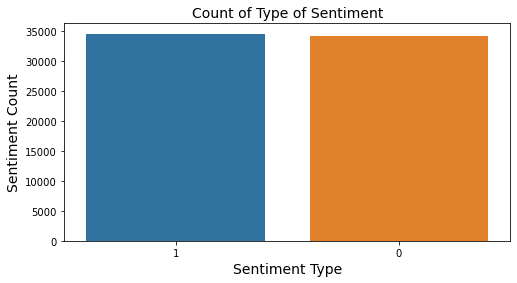

In [19]:
truthfulness_values = df['truthfulness'].value_counts() #index then values
print('truthfulness_values --- \n', truthfulness_values)
print('**'*40)

## Plotting
plt.figure(figsize=(8,4))
sns.countplot(x='truthfulness', data=df,
              order=truthfulness_values.index)
plt.title('Count of Type of Sentiment', fontsize=14, c='k')
plt.xlabel('Sentiment Type', fontsize=14, c='k')
plt.ylabel('Sentiment Count', fontsize=14, c='k')

# Wordcloud for positive reasons

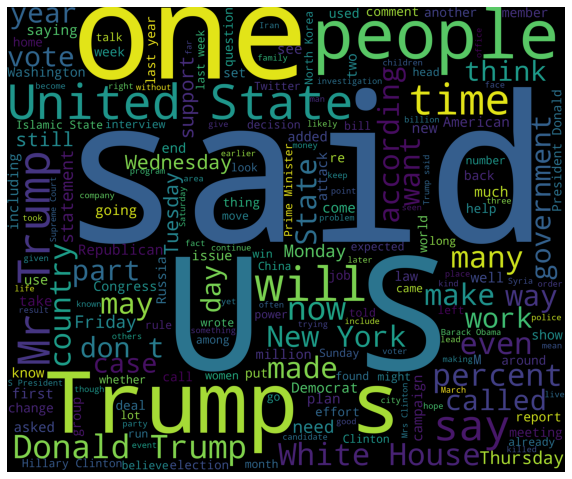

In [20]:
new_df=df[df['truthfulness']==1]
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Wordcloud for Negative sentiments of tweets

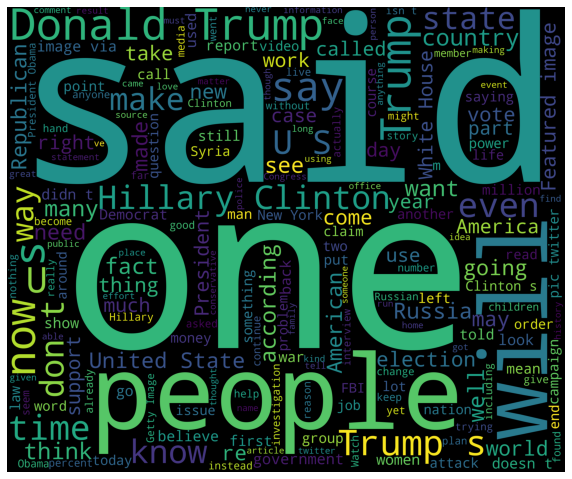

In [21]:
new_df=df[df['truthfulness']==0]
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Preprocessing the tweet text data

In [19]:
df['text']

77223    Illuminates plan to use Islam to start the thi...
51813    The EPA had already started expanding powers o...
32270    New Jersey Gov. Chris Christie is refusing to ...
18966    U.S. President Donald Trump and Spain s Prime ...
44274    This is an interesting development in the Muel...
                               ...                        
65947    November 2015 Ads Russia reveals chilling firs...
23387    When the two men plunged into the unforgiving ...
5008     The American Civil Liberties Union is launchin...
44385    Here s more proof that liberals don t like fre...
67313    Pieczenik: ‘There is a coup in the White House...
Name: text, Length: 68604, dtype: object

In [20]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [21]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))
df['clean_tweet']

77223    illuminates plan use islam start third world w...
51813    epa already started expanding powers private p...
32270    new jersey gov chris christie refusing hand cr...
18966    u president donald trump spain prime minister ...
44274    interesting development mueller investigation ...
                               ...                        
65947    november ads russia reveals chilling first ima...
23387    two men plunged unforgiving wilderness adirond...
5008     american civil liberties union launching bills...
44385    proof liberals like free speech unless speech ...
67313    pieczenik coup white house going stop full sca...
Name: clean_tweet, Length: 68604, dtype: object

In [22]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 6.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
#Removing Contractions
import contractions
for row in df['clean_tweet']:
    contractions.fix(row)

In [24]:
df.shape

(68604, 3)

In [25]:
df

,text,truthfulness,clean_tweet
77223,Illuminates plan to use Islam to start the thi...,0,illuminates plan use islam start third world w...
51813,The EPA had already started expanding powers o...,0,epa already started expanding powers private p...
32270,New Jersey Gov. Chris Christie is refusing to ...,1,new jersey gov chris christie refusing hand cr...
18966,U.S. President Donald Trump and Spain s Prime ...,1,u president donald trump spain prime minister ...
44274,This is an interesting development in the Muel...,0,interesting development mueller investigation ...
...,...,...,...
65947,November 2015 Ads Russia reveals chilling firs...,0,november ads russia reveals chilling first ima...
23387,When the two men plunged into the unforgiving ...,1,two men plunged unforgiving wilderness adirond...
5008,The American Civil Liberties Union is launchin...,1,american civil liberties union launching bills...
44385,Here s more proof that liberals don t like fre...,0,proof liberals like free speech unless speech ...


In [26]:
df=df.head(14640)

# preparing the data for LSTM

In [29]:
#number of row
lenght_text =len(df['clean_tweet'])
max_words = len(set(" ".join(df['clean_tweet']).split()))
lenght_text,max_words

(14640, 95099)

In [30]:
#by turning each text into either a sequence of integers 
#(each integer being the index of a token in a dictionary) 
#dictionary make by words which is the most frequency is put first and take 0 ...
max_fatures =max_words # max_words
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['clean_tweet'].values)
X = tokenizer.texts_to_sequences(df['clean_tweet'].values)
X = pad_sequences(X)
X

array([[    0,     0,     0, ..., 16538,   832,   585],
       [    0,     0,     0, ...,   293,   193,  2948],
       [    0,     0,     0, ...,  2777,   406,   524],
       ...,
       [    0,     0,     0, ...,  3674,   111,    16],
       [    0,     0,     0, ...,  8235,   832,   585],
       [    0,     0,     0, ...,    73,  1190,   675]], dtype=int32)

In [31]:
X.shape

(14640, 8981)

In [32]:
Y = pd.get_dummies(df['truthfulness']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11712, 8981) (11712, 2)
(2928, 8981) (2928, 2)


# LSTM

In [33]:
embed_dim = 100
lstm_out = 100

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

2023-01-29 15:33:03.621799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 15:33:03.622826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 15:33:03.724270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 15:33:03.725078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-29 15:33:03.725857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8981, 100)         9509900   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 9,590,502
Trainable params: 9,590,502
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 32
history=model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size
          ,validation_data=(X_test, Y_test),callbacks=[early_stop])

2023-01-29 15:33:07.913228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-01-29 15:33:11.400983: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


366/366 [==============================] - 130s 340ms/step - loss: 0.2721 - accuracy: 0.8803 - val_loss: 0.2292 - val_accuracy: 0.9228
Epoch 2/20
366/366 [==============================] - 125s 342ms/step - loss: 0.0863 - accuracy: 0.9726 - val_loss: 0.2427 - val_accuracy: 0.9221
Epoch 3/20
366/366 [==============================] - 125s 342ms/step - loss: 0.0383 - accuracy: 0.9893 - val_loss: 0.2480 - val_accuracy: 0.9173


# word2vec

In [30]:
from gensim.models import Word2Vec
import pandas as pd
df_new=pd.DataFrame(x)
df_new['label']=y
df_new

,clean_tweet,label
37396,issuing passports people donbas russia humanit...,0
11043,trump administration proposed billion wall spe...,0
20934,every day barack obama rubs radical transforma...,0
15482,irony lost us hillary compared president wante...,0
26806,world socialist web site telecommunications ca...,0
...,...,...
50021,president elect donald trump transition team a...,1
8441,january u state department announced agency id...,0
33426,cnn also known clinton news network gone way t...,0
24006,shares two party corporate duopoly remains mir...,0


In [31]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def tokenize(d):
    return word_tokenize(d)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
df_new['clean_tweet2']= df_new.clean_tweet.apply(clean_text).apply(tokenize)
df_new.clean_tweet2.head()

37396    [issuing, passports, people, donbas, russia, h...
11043    [trump, administration, proposed, billion, wal...
20934    [every, day, barack, obama, rubs, radical, tra...
15482    [irony, lost, us, hillary, compared, president...
26806    [world, socialist, web, site, telecommunicatio...
Name: clean_tweet2, dtype: object

In [33]:
from gensim.models import Word2Vec

texts_w2v = df_new.clean_tweet2.to_list()

w2v = Word2Vec(sentences = texts_w2v, window = 3,
               vector_size = 100, min_count = 5, workers = 4, sg = 1) #skip gram(1)

In [34]:
def get_avg_vector(sent):
    vector = np.zeros(100)
    total_words = 0
    for word in sent.split():        
        if word in w2v.wv.index_to_key:
            vector += w2v.wv.word_vec(word)
            total_words += 1
    if total_words > 0:
        return vector / total_words
    else:
        return vector

In [35]:
df_new['w2v_vector'] = df_new['clean_tweet'].map(get_avg_vector)
df_new[['clean_tweet', 'w2v_vector']].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  


,clean_tweet,w2v_vector
37396,issuing passports people donbas russia humanit...,"[-0.13396773871500045, 0.0682527300377842, 0.0..."
11043,trump administration proposed billion wall spe...,"[-0.12361937871233361, 0.24924425296027397, 0...."
20934,every day barack obama rubs radical transforma...,"[-0.08984974873114314, 0.07511963917113852, 0...."
15482,irony lost us hillary compared president wante...,"[0.004703065353691921, 0.1888954165356833, 0.1..."
26806,world socialist web site telecommunications ca...,"[-0.12447782966685055, 0.178642642948976, 0.13..."


In [36]:
df_new

,clean_tweet,label,clean_tweet2,w2v_vector
37396,issuing passports people donbas russia humanit...,0,"[issuing, passports, people, donbas, russia, h...","[-0.13396773871500045, 0.0682527300377842, 0.0..."
11043,trump administration proposed billion wall spe...,0,"[trump, administration, proposed, billion, wal...","[-0.12361937871233361, 0.24924425296027397, 0...."
20934,every day barack obama rubs radical transforma...,0,"[every, day, barack, obama, rubs, radical, tra...","[-0.08984974873114314, 0.07511963917113852, 0...."
15482,irony lost us hillary compared president wante...,0,"[irony, lost, us, hillary, compared, president...","[0.004703065353691921, 0.1888954165356833, 0.1..."
26806,world socialist web site telecommunications ca...,0,"[world, socialist, web, site, telecommunicatio...","[-0.12447782966685055, 0.178642642948976, 0.13..."
...,...,...,...,...
50021,president elect donald trump transition team a...,1,"[president, elect, donald, trump, transition, ...","[-0.09822906524652485, 0.16518746110508165, 0...."
8441,january u state department announced agency id...,0,"[january, u, state, department, announced, age...","[0.031699268598733295, 0.12256869836380917, 0...."
33426,cnn also known clinton news network gone way t...,0,"[cnn, also, known, clinton, news, network, gon...","[-0.03651866976349171, 0.16900703827447996, 0...."
24006,shares two party corporate duopoly remains mir...,0,"[shares, two, party, corporate, duopoly, remai...","[-0.05250439144014281, 0.1765158593872456, 0.1..."


In [37]:
df_new['index_column'] = df_new.index

#using reset_index() to set index into column
#df2=df_new.reset_index()

#Using reset_index, inplace=True
df_new.reset_index(inplace=True)

In [38]:
df_new

,index,clean_tweet,label,clean_tweet2,w2v_vector,index_column
0,37396,issuing passports people donbas russia humanit...,0,"[issuing, passports, people, donbas, russia, h...","[-0.13396773871500045, 0.0682527300377842, 0.0...",37396
1,11043,trump administration proposed billion wall spe...,0,"[trump, administration, proposed, billion, wal...","[-0.12361937871233361, 0.24924425296027397, 0....",11043
2,20934,every day barack obama rubs radical transforma...,0,"[every, day, barack, obama, rubs, radical, tra...","[-0.08984974873114314, 0.07511963917113852, 0....",20934
3,15482,irony lost us hillary compared president wante...,0,"[irony, lost, us, hillary, compared, president...","[0.004703065353691921, 0.1888954165356833, 0.1...",15482
4,26806,world socialist web site telecommunications ca...,0,"[world, socialist, web, site, telecommunicatio...","[-0.12447782966685055, 0.178642642948976, 0.13...",26806
...,...,...,...,...,...,...
14635,50021,president elect donald trump transition team a...,1,"[president, elect, donald, trump, transition, ...","[-0.09822906524652485, 0.16518746110508165, 0....",50021
14636,8441,january u state department announced agency id...,0,"[january, u, state, department, announced, age...","[0.031699268598733295, 0.12256869836380917, 0....",8441
14637,33426,cnn also known clinton news network gone way t...,0,"[cnn, also, known, clinton, news, network, gon...","[-0.03651866976349171, 0.16900703827447996, 0....",33426
14638,24006,shares two party corporate duopoly remains mir...,0,"[shares, two, party, corporate, duopoly, remai...","[-0.05250439144014281, 0.1765158593872456, 0.1...",24006


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [42]:
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
#               MultinomialNB(),  # Don't use Naive Bayes since w2v_vector contains negative numbers, then it causes an error.
              SVC(**model_params)]
model_name = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 
for model, model_name in zip(model_list, model_name):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df_new.index, df_new.label)):        
        X_trn = np.stack(df_new.loc[trn_idx, 'w2v_vector'])
        y_trn = df_new.loc[trn_idx, 'label']
        
        X_vld = np.stack(df_new.loc[vld_idx, 'w2v_vector'])
        y_vld = df_new.loc[vld_idx, 'label']        
        
        model.fit(X_trn, y_trn)
        pred_col = f"{model_name}_w2v_pred"
        df_new.loc[vld_idx, pred_col] = model.predict(X_vld)
        

    print(f"Model: {model_name}, Word2Vec, Accuracy: {accuracy_score(df_new.label, df_new[pred_col]):.3%}\n")

Model: LogisticRegression, Word2Vec, Accuracy: 87.917%

Model: RandomForest, Word2Vec, Accuracy: 87.596%

Model: SupportVectorMachine, Word2Vec, Accuracy: 89.372%



# preparing data to use SVM

In [27]:
x = df.clean_tweet
y = df.truthfulness

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.20, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11712 11712
2928 2928


In [29]:
#vector words or word embadding
#Using CountVectorizer to Extracting Features from Text
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [30]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [31]:
x_train_dtm.shape

(11712, 84045)

In [32]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)

SVC(kernel='linear', random_state=10)

In [33]:
#predicting output for test data
pred = model.predict(x_test_dtm)
#accuracy score
accuracy_score(y_test,pred)

0.9012978142076503

In [34]:
cm = confusion_matrix(y_test, pred)
cm

array([[1321,  156],
       [ 133, 1318]])

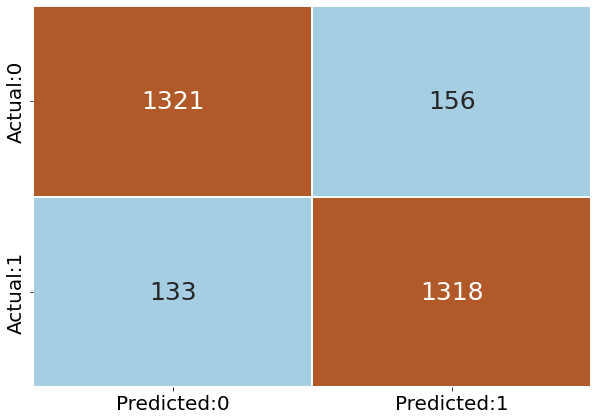

In [35]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [10,7]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1477
           1       0.89      0.91      0.90      1451

    accuracy                           0.90      2928
   macro avg       0.90      0.90      0.90      2928
weighted avg       0.90      0.90      0.90      2928



# logisticRegression and TfidfVectorizer and using all df

In [41]:
len(df)


68604

In [42]:
df

,text,truthfulness,clean_tweet
50705,U.S. President-elect Donald Trump plans meetin...,1,u president elect donald trump plans meetings ...
8494,In a recent candid interview with the Washingt...,0,recent candid interview washington post democr...
72577,Lancashire Police has introduced a “Police wit...,1,lancashire police introduced police pride vehi...
6944,The 2016 crop of GOP Clown Car candidates is s...,0,crop gop clown car candidates simply awful don...
39909,"For Western Europe, the territory to the East ...",0,western europe territory east annex resources ...
...,...,...,...
47109,"The mayor of Paris, where a landmark global cl...",1,mayor paris landmark global climate agreement ...
5325,A Detroit man has been sentenced to 25-50 year...,0,detroit man sentenced years prison year old so...
9295,What a bitter woman! She blames a different th...,0,bitter woman blames different thing every week...
24517,"by DML DAILY / November 4, 2016 / IMMIGRATION ...",0,dml daily november immigration illegal aliens ...


In [43]:
x = df["clean_tweet"]
y = df["truthfulness"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [47]:
pred_lr=LR.predict(xv_test)

In [48]:
LR.score(xv_test, y_test)

0.9345227683516996

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8508
           1       0.94      0.94      0.94      8643

    accuracy                           0.94     17151
   macro avg       0.94      0.94      0.94     17151
weighted avg       0.94      0.94      0.94     17151

